In [1]:

import numpy as np
import pandas as pd
import scipy
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import tqdm
import sklearn
from sklearn import datasets
from sklearn import svm

# Linear Regression


*   Dataset: house price from boston
*   Objective: implement both numerical + analytical solutions
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


1.   Analytical solution: $\beta = (X^TX)^{-1}X^T y$
2.   Numerical solution:

      *   Loss function (MSE): $\mathcal{L} (y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N (y-\hat{y})^2$
      *   Update rule: $\beta_{t+1} = \beta_t - \gamma \nabla \mathcal{L} (\beta_t)$
      *   Momentum: $\Delta \beta_{t+1} = -\gamma \nabla \mathcal{L}(\beta_{t+1}) + \alpha\Delta \beta_{t}$
      *   Update rule for momentum:  $\beta_{t+1} = \beta_t + \Delta \beta_{t}$
*  Visualize loss convergent
*  Plot linear regression line 
*  Comparison:
    -  Time 
    -  MSE
    -  Matching parameter vectors $\beta$








In [2]:
# LOAD DATA
X, y = datasets.load_boston(return_X_y=True)

print(X.shape)
print(X)
print("..")
print(np.random.rand(X.shape[1]))


(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
..
[0.1168085  0.40599943 0.55655905 0.05860638 0.90580635 0.70806744
 0.9122747  0.62973435 0.26900054 0.57251134 0.46854843 0.65122341
 0.4035748 ]


In [3]:
# IMPLEMENT GRADIENT DESCENT HERE
# REQUIREMENTS: a function to calculate the gradient , a function to calculate the loss function, a function to excecute gradient descent
class LinearRegression:
    
    
    def cost_function(self, X, y, beta):                 
        cost = 0
        m = len(y)
        predictions = X.dot(beta)
        #print('predictions= ', predictions[:5])
        errors = np.subtract(predictions, y)
        #print('errors= ', errors[:5]) 
        sqrErrors = np.square(errors)
        #print('sqrErrors= ', sqrErrors[:5]) 
        cost = 1/(2*m) * errors.T.dot(errors)
        return cost


    def gradient(self, X, y, beta):
        R, C = np.shape(X)
        y_pred = np.matmul(X, beta)
        error = y_pred - y
        return np.matmul(np.transpose(x_in), error) / float(R)
      
    
    def fit(self, X, y, tau = 0.01, gamma =0.05):        
        loss = []
        beta = np.random.rand(X.shape[1])
        N = len(X)
        loss.append(beta)
        cost_dif = LinearRegression.gradient(X,y,beta)

        while cost_dif >= tau:
          d_beta = cost_dif  

            # Gradient Descent
          beta = loss[-1] - gamma*d_beta

            # Saving Progress
          loss.append(beta) 
          cost_dif = LinearRegression.gradient(X,y,beta)

        self.beta = beta
        self.loss = loss
    
    def predict(self, X):
        return X.dot(self.beta)

    def fit_momentum(self, X, y, tau = 0.01, gamma =0.05, alpha = 0.05):        
        loss = []
        beta = rand(X.shape[1])
        N = len(X)
        loss.append(beta)
        cost_dif = LinearRegression.gradient(X,y,beta)
        v_old = np.zeros_like(beta)  

        while cost_dif >= tau:        
            #d_beta = cost_dif  
            # Gradient Descent with momentum
            v_new = alpha*v_old + gamma*cost_dif
            beta = loss[-1] - v_new
            # Saving Progress
            loss.append(beta)
            v_old = v_new 
            cost_dif = LinearRegression.gradient(X,y,beta)      
                  
        self.beta = beta
        self.loss = loss


(506, 13) (506,)


ValueError: x and y must be the same size

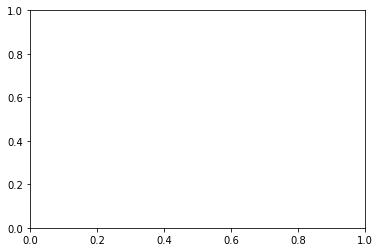

In [4]:
# VISUALIZATION
print(X.shape, y.shape)
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: ignored

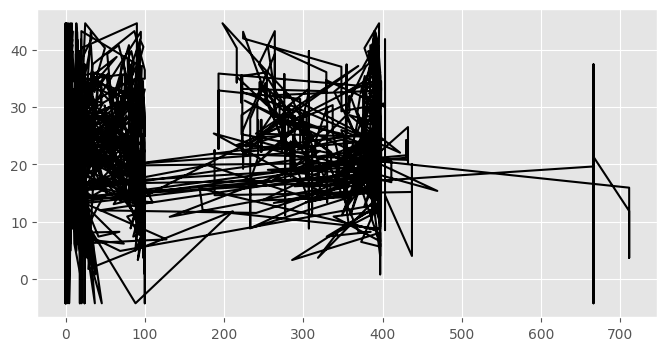

In [ ]:
# SOLUTION FROM SKLEARN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model



In [5]:
#SOLUTION_Kong
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
#theta = np.zeros(X.shape[1])
#print(theta)
#fitting the model
lr.fit(X,y)
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the Test set results
y_pred = lr.predict(X)

print("Train rmse: " + str(mean_squared_error(y,y_pred)**0.5))
#accuracy_score(y, y_pred)



Train rmse: 4.679191295697281


# Logistic Regression

*   Dataset: breast cancer dataset
*   Objective: implement both numerical solution
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


#   Numerical solution:

*   Loss function (Maximum Likelihood Estimator): $\mathcal{L} (y,\hat{y}) = -\frac{1}{N}\sum_{i=1}^N \left[y_i\cdot\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right]$
      

In [6]:
# Based on lecture of anh Co:
class LogisticRegression1:
  
 
    def logistic_function(self, t):
        result= np.log(self.t)
        return result
    
    def sigmoid(x):
        return 1/(1+np.exp(-x))
  
    def dot_product(beta,x):
        return np.dot(x,beta)
   
    def probability(self,beta,x):
        return self.sigmoid(self.dot_product(beta,x))

    def cost_function(self, beta,X,y):         
        N=X.shape[0]
        sum_cost= -(1/N) * np.sum(y*np.log(self.probability(beta,X)) + (1-y)*np.log(1-self.probability(beta,X)))
        return sum_cost
  

    def grad_function(self, beta,X,y):
        m= X.shape[0]
        return (1 / m) * np.dot(X.T, self.sigmoid(self.dot_product( beta,X)) - y)



  # Using fmin_tnc from scipy
    def fit(self,X,y,beta):
        opt_weights = scipy.optimize.fmin_tnc(func=self.cost_function, x0=beta, fprime=self.grad_function,
                               args=(X, y.flatten()))
        self.w_ = opt_weights[0]
        return self


# Checking accuracy of model:

    def predict(self, X): 
        beta= self.w_[:,np.newaxis]       
        return self.probability(beta,X)

    def accuracy(self, X, actual_classes, probab_threshold=0.5):
            predicted_classes = (predict(X) >= probab_threshold).astype(int)
            predicted_classes = predicted_classes.flatten()
            accuracy = np.mean(predicted_classes == actual_classes)
            return accuracy * 100


In [8]:
# Data set: 
from sklearn.datasets import load_breast_cancer
X,y= load_breast_cancer(return_X_y=True)


# data['y'] = target
# df = data.copy()
# X = df.values[:,:2]
# y = df.values[:,-1]
# X = X[:,:2]
X = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.zeros((X.shape[1], 1))

model1 = LogisticRegression1()

model1.fit(X, y,theta)
accuracy_score = model1.accuracy(X,y.flatten())
parameters = model1.w_
print("The accuracy of the model is {}".format(accuracy_score))
print("The model parameters using Gradient descent")
print("\n")
print(parameters)

TypeError: dot_product() takes 2 positional arguments but 3 were given

In [ ]:
# Scikit-learn implementation: 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression()
model.fit(X, y)
parameters = model.coef_
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters using scikit learn")
print(parameters)



NameError: ignored

# Support Vector Machine


*   Dataset: breast cancer
*   Objective: understand how SVM work/ the effects of choosing kernels on dataset



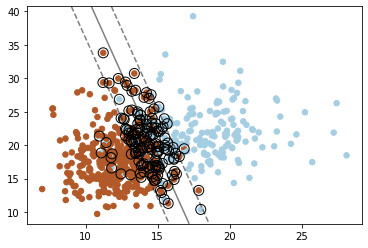

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y = True)
X = X[:,:2]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()